In [79]:
# Packages Importing
# !pip install yfinance
import yfinance as yf
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

##########################################


start_date = dt.datetime(2006,1,1)
end_date = dt.datetime(2016,9,1)

tickers = ['AMZN', 'PYPL', 'MSFT', 'GS', 'WMT', ]

yf.pdr_override()

df = yf.download(tickers, start_date, end_date)
df.head(2)

[*********************100%***********************]  5 of 5 completed


Adj Close                                         \
                               AMZN          GS       MSFT PYPL        WMT   
Date                                                                         
2006-01-03 00:00:00-05:00    2.3790  101.194176  19.162519  NaN  31.979057   
2006-01-04 00:00:00-05:00    2.3625   99.796425  19.255331  NaN  32.041302   

                            Close                                     ...  \
                             AMZN          GS       MSFT PYPL    WMT  ...   
Date                                                                  ...   
2006-01-03 00:00:00-05:00  2.3790  128.869995  26.840000  NaN  46.23  ...   
2006-01-04 00:00:00-05:00  2.3625  127.089996  26.969999  NaN  46.32  ...   

                             Open                                     \
                             AMZN          GS   MSFT PYPL        WMT   
Date                                                                   
2006-01-03 00:00:00-05:00  2.3735  126.699997  26.25  NaN  46.360001   
2006-01-04 00:00:00-05:00  2.3745  127.349998  26.77  NaN  46.240002   

                              Volume                                    
                                AMZN       GS      MSFT PYPL       WMT  
Date                                                                    
2006-01-03 00:00:00-05:00  151644000  6188700  79973000  NaN  23413500  
2006-01-04 00:00:00-05:00  148818000  4861600  57975600  NaN  14087200  

[2 rows x 30 columns]

Max cose prices were: 

max date is: Returns
AMZN   2006-07-26 00:00:00-04:00
GS     2009-01-20 00:00:00-05:00
MSFT   2009-01-22 00:00:00-05:00
PYPL   2016-07-22 00:00:00-04:00
WMT    2015-10-14 00:00:00-04:00
dtype: datetime64[ns, America/New_York]
min date is:  Returns
AMZN   2007-04-25 00:00:00-04:00
GS     2008-11-24 00:00:00-05:00
MSFT   2008-10-13 00:00:00-04:00
PYPL   2016-01-28 00:00:00-05:00
WMT    2008-10-28 00:00:00-04:00
dtype: datetime64[ns, America/New_York]
Riskiest stock was:  Returns
AMZN    0.026288
dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


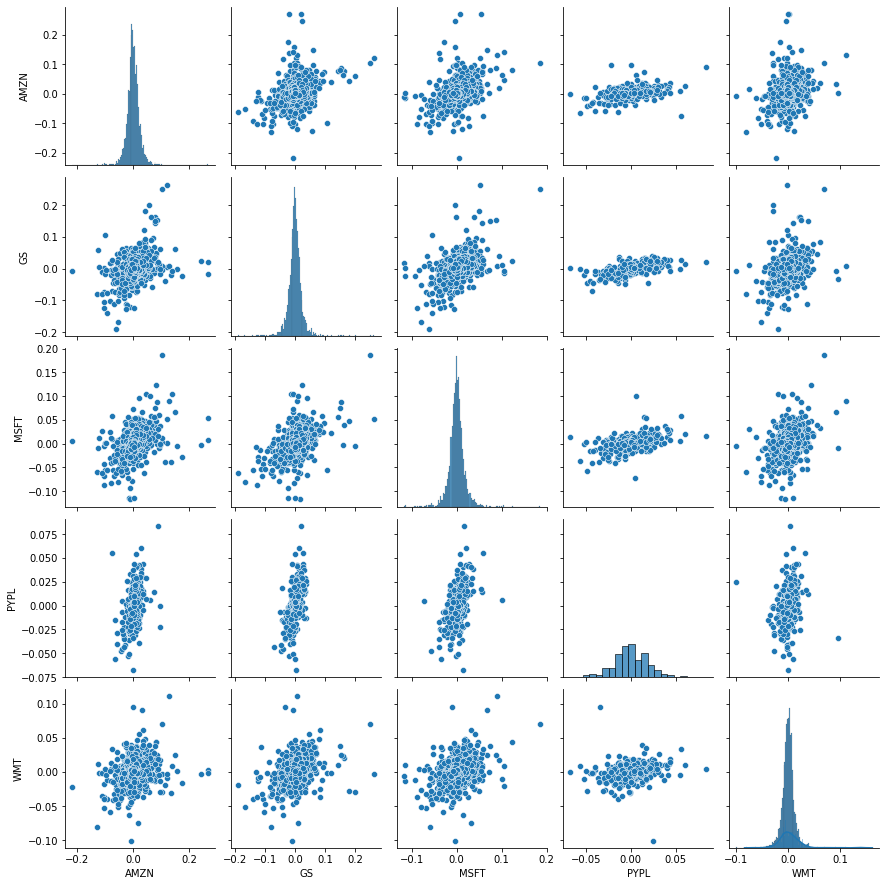

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


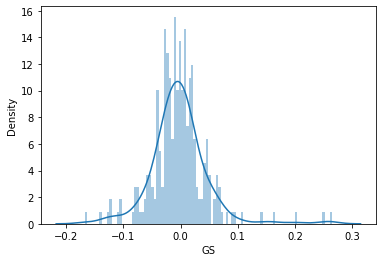

In [86]:
# Play with pulling different stocks with different dates. 
df.columns.names = ['Stock info', 'Stock ticker']
df.head(2)

#find max close price 
print("Max cose prices were: \n")
df['Adj Close'].max()

#calculate returns
df_ret = df.pct_change()
# df_ret = (df - df.shift(-1) ) /df.shift(-1)
df_ret = df_ret['Close']
df_ret.columns.names = ['Returns']
df_ret.dropna()
sns.pairplot(df_ret)

#find max and min returns dates
print("max date is:", df_ret.idxmin())
print("min date is: " ,df_ret.idxmax() )
df_std = df_ret.std()
df_std[df_std == df_std.max()]
print("Riskiest stock was: ", df_std[df_std == df_std.max()])


#2015 returns std
df_ret.loc['2015-01-01':'2015-12-31'].std()

#MS returns
AMZN_ret_15 = df_ret.loc['2015-01-01':'2015-12-31']['AMZN']
sns.distplot(AMZN_ret_15, bins =100)
plt.show()

#2008 citigroup
GS_ret_08 = df_ret.loc['2008-01-01':'2008-12-31']['GS']
sns.distplot(GS_ret_08, bins =100)
plt.show()


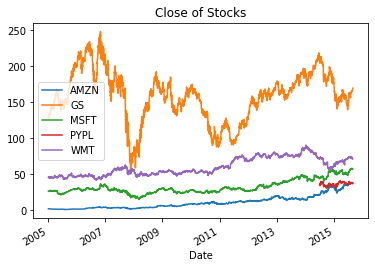

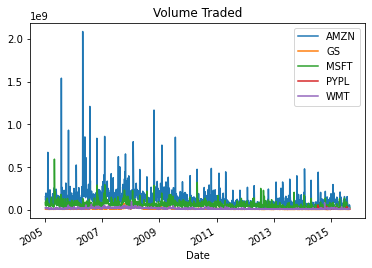

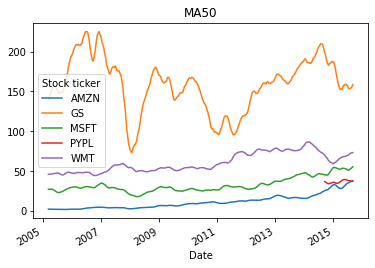

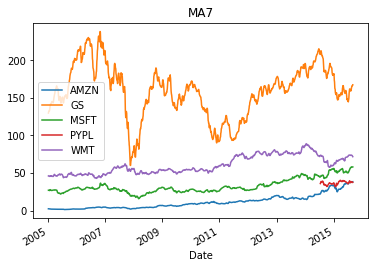

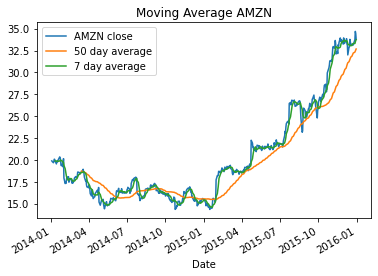

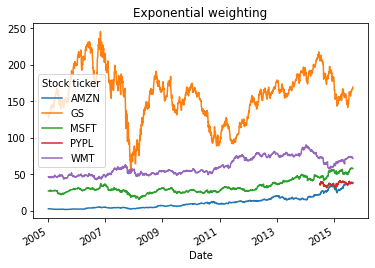

In [102]:
# Plotting close
df['Close'].plot()
plt.title('Close of Stocks')
plt.legend()
plt.show()

#Plot volume
df['Volume'].plot()
plt.title('Volume Traded')
plt.legend()
plt.show()

# Moving average 50
df_ma50 = df['Close'].rolling(50).mean()
df_ma50.plot()
plt.title('MA50')
plt.show()

#MA 7
df_MA7 = df['Close'].rolling(7).mean()
df_MA7.plot()
plt.title('MA7')
plt.legend()
plt.show()


#MA for AMZN
df_AMZN = df.loc['2014-01-01':'2015-12-31']['Close']['AMZN']
df_ma50_A =df_AMZN.rolling(50).mean()
df_ma7_A = df_AMZN.rolling(7).mean()
df_AMZN.plot(label = "AMZN close")
df_ma50_A.plot(label = "50 day average")
df_ma7_A.plot(label = "7 day average")
plt.title('Moving Average AMZN')
plt.legend()
plt.show()

#do exponential weighting as well
df_ewm = df['Close'].ewm(com = 0.5).mean()
df_ewm.plot()
plt.title('Exponential weighting')
plt.show()


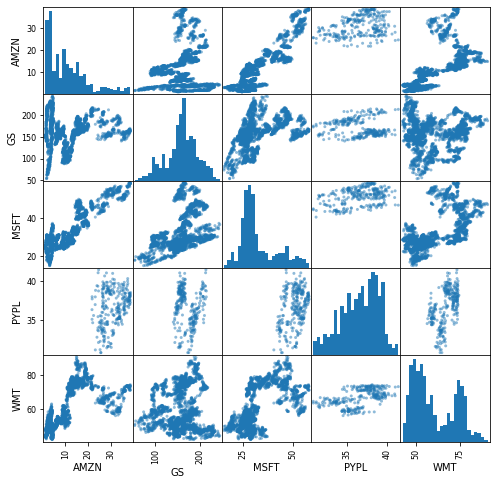

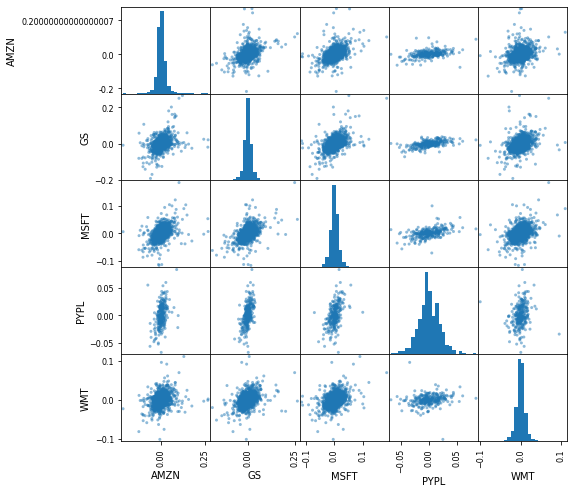

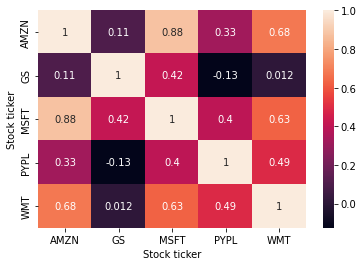

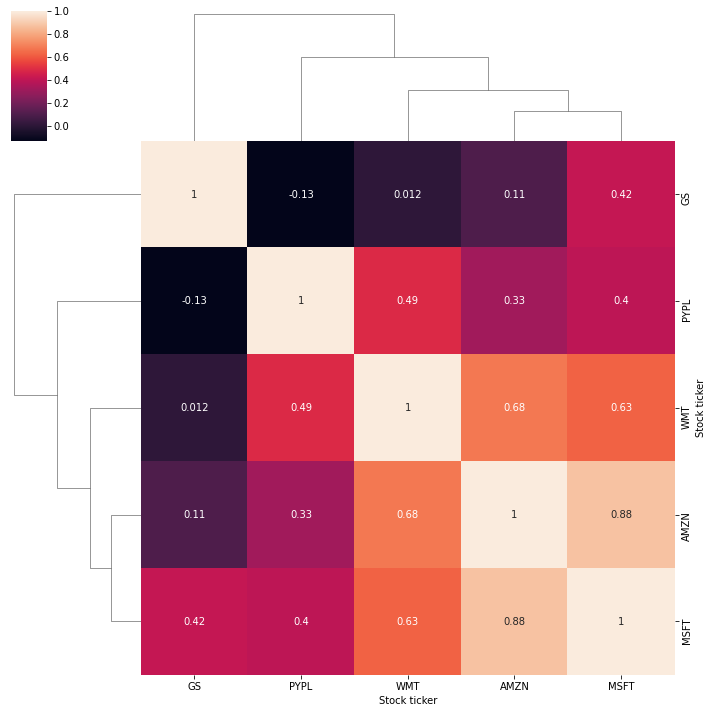

In [103]:
#Correlation
from pandas.plotting import scatter_matrix
scatter_matrix(df['Open'],figsize = (8,8), hist_kwds= {'bins':25})
plt.show()

# do the same with daily returns
scatter_matrix(df_ret,figsize = (8,8), hist_kwds= {'bins':25})
plt.show()

#Corelation heatmap
sns.heatmap(df['Close'].corr(), annot=True)
plt.show()

#clustermap
sns.clustermap(df['Close'].corr(), annot=True)
plt.show()

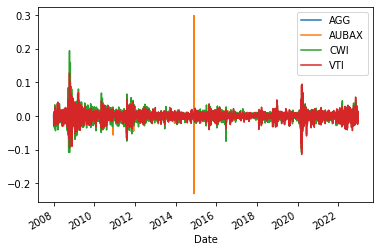

In [ ]:
#Volatility
returns = (df['Close']/df['Close'].shift(1)) -1
returns.plot()


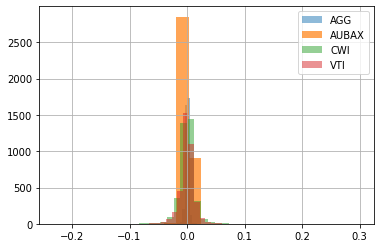

In [ ]:
returns['AGG'].hist( bins = 25, label = 'AGG',  alpha = 0.5 )
returns['AUBAX'].hist(  bins = 25,  label = 'AUBAX',alpha = 0.7 )
returns['CWI'].hist( bins = 25,  label = 'CWI', alpha = 0.5)
returns['VTI'].hist(  bins = 25,  label = 'VTI',alpha = 0.5 )
plt.legend()

In [ ]:
# Play with datetime-  new starts/ends on above tickers (stocks)
# use the resample function on datatime/pandas to average/sum over large time periods. df.resample('W').mean() ('W' is weekly)
# Understand how the pandas multi-indexing works on the columns a little bit (pick one price type e.g. Adj. close, remove the rest). have a look at "df.columns"
start_date = dt.datetime(2008,1,1)
end_date = dt.datetime(2022,12,24)
df = yf.download(tickers, start_date, end_date)
df.resample('W').mean()

# Pull an index
data = yf.download('SPY','2008-1-1','2022-12-24', auto_adjust=True)
ohlcv_dict = {
     'Open': 'first',
     'High': 'max',
     'Low': 'min',
     'Close': 'last',
     'Volume': 'sum'
}

data.resample('10D').agg(ohlcv_dict)

In [ ]:
# Make some arbitrary investigations about the stocks e.g. % time that T consectutive daily losses resulted in T+1 being a win (will need to convert to daily returns first, as per other tasks)
# day_after_dict = {}
# for days_loss in range(3,15):
#   day_after_pos = []
#   for i in range(df.shape[0]):
#     if df.loc[i, 'ret'] < 0:
#       if (df.loc[i:i +days_loss , 'ret'] <=0).all():
#         if (df.loc[i+days_loss+1 , 'ret'] >0):
#           day_after_pos.append(1)
#         else:
#           day_after_pos.append(0)
#   day_after_dict[days_loss] = np.mean(day_after_pos)